In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

In [2]:
def compare_batch(data, n_agents, start_epoch, end_epoch, batches):
    #plt.style.use('seaborn-darkgrid')
    plt.style.use('seaborn-whitegrid')

    fig, ax = plt.subplots(1, n_agents, figsize=(35, 8), constrained_layout=True)
    fig1, ax_total = plt.subplots(figsize=(20, 10))

    for j in range(0, len(data)):
        d = data[j][0]
        label = data[j][1]
        cum_reward = np.zeros((n_agents, batches))
        cum_reward_total = np.zeros((end_epoch - start_epoch, n_agents, batches))
        for i in range(start_epoch, end_epoch):
            agent_names = list(d[i].keys())
            agent_names.sort()
            assert len(agent_names) == n_agents, 'Mismatch between data agent num, and n_agents: %s, %s' % (len(agent_names), n_agents)
            for batch in range(0, batches):
                for agent_ix in range(0, n_agents):
                    agent = agent_names[agent_ix]
                    cum_reward[agent_ix, batch] = 0.05 * d[i][agent][2][batch] + (1 - 0.05) * cum_reward[agent_ix, batch]
                cum_reward_total[i] = cum_reward

        mean_agent_performance = cum_reward_total.mean(axis=2)
        min_agent_performance = cum_reward_total.min(axis=2)
        max_agent_performance = cum_reward_total.max(axis=2)

        for agent_ix in range(0, n_agents):
            x = np.arange(start_epoch, end_epoch)
            ax[agent_ix].plot(x, mean_agent_performance[start_epoch:end_epoch, agent_ix], label=label, linewidth=3)
            ax[agent_ix].fill_between(x, min_agent_performance[start_epoch:end_epoch, agent_ix],
                                      max_agent_performance[start_epoch:end_epoch, agent_ix], alpha=0.35)
            agent = agent_names[agent_ix]
            ax[agent_ix].set_title(agent, fontsize=24)
            ax[agent_ix].set_xlabel('Epochs', fontsize=48, fontweight='bold')
            ax[agent_ix].tick_params(axis="x", labelsize=24)
            ax[agent_ix].tick_params(axis="y", labelsize=24)
            ax[agent_ix].set_xlim(0, 999)
            ax[agent_ix].set_ylim(-0.75, 3.25)
            ax[0].set_ylabel('Individual Reward', fontsize=48, fontweight='bold')

        team_performance = cum_reward_total.sum(axis=1)
        mean_team_performance = team_performance.mean(axis=1)
        min_team_performance = team_performance.min(axis=1)
        max_team_performance = team_performance.max(axis=1)

        x_axis = np.arange(start_epoch, end_epoch)
        ax_total.plot(x_axis, mean_team_performance, label=label, linewidth=3)
        ax_total.fill_between(x_axis, min_team_performance, max_team_performance, alpha=0.35)
    #handles, labels = fig.gca().get_legend_handles_labels()
    #by_label = OrderedDict(zip(labels, handles))
    # ax.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=24)
    #ax_total.legend(by_label.values(), by_label.keys(), loc='lower right', fontsize=36)
    plt.xlabel('Epochs', fontsize=48, fontweight='bold')
    plt.ylabel('Mean Team Reward', fontsize=48, fontweight='bold')
    plt.xticks(fontsize=48)
    plt.yticks(fontsize=48)
    plt.xlim(0, 999)
    plt.ylim(-1, 8.5)
    # fig.suptitle('Agent Performance over Time', fontsize=16)
    # fig1.suptitle('Team Performance over Time')
    fig.show()

c:\users\sean\anaconda3\envs\marl\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


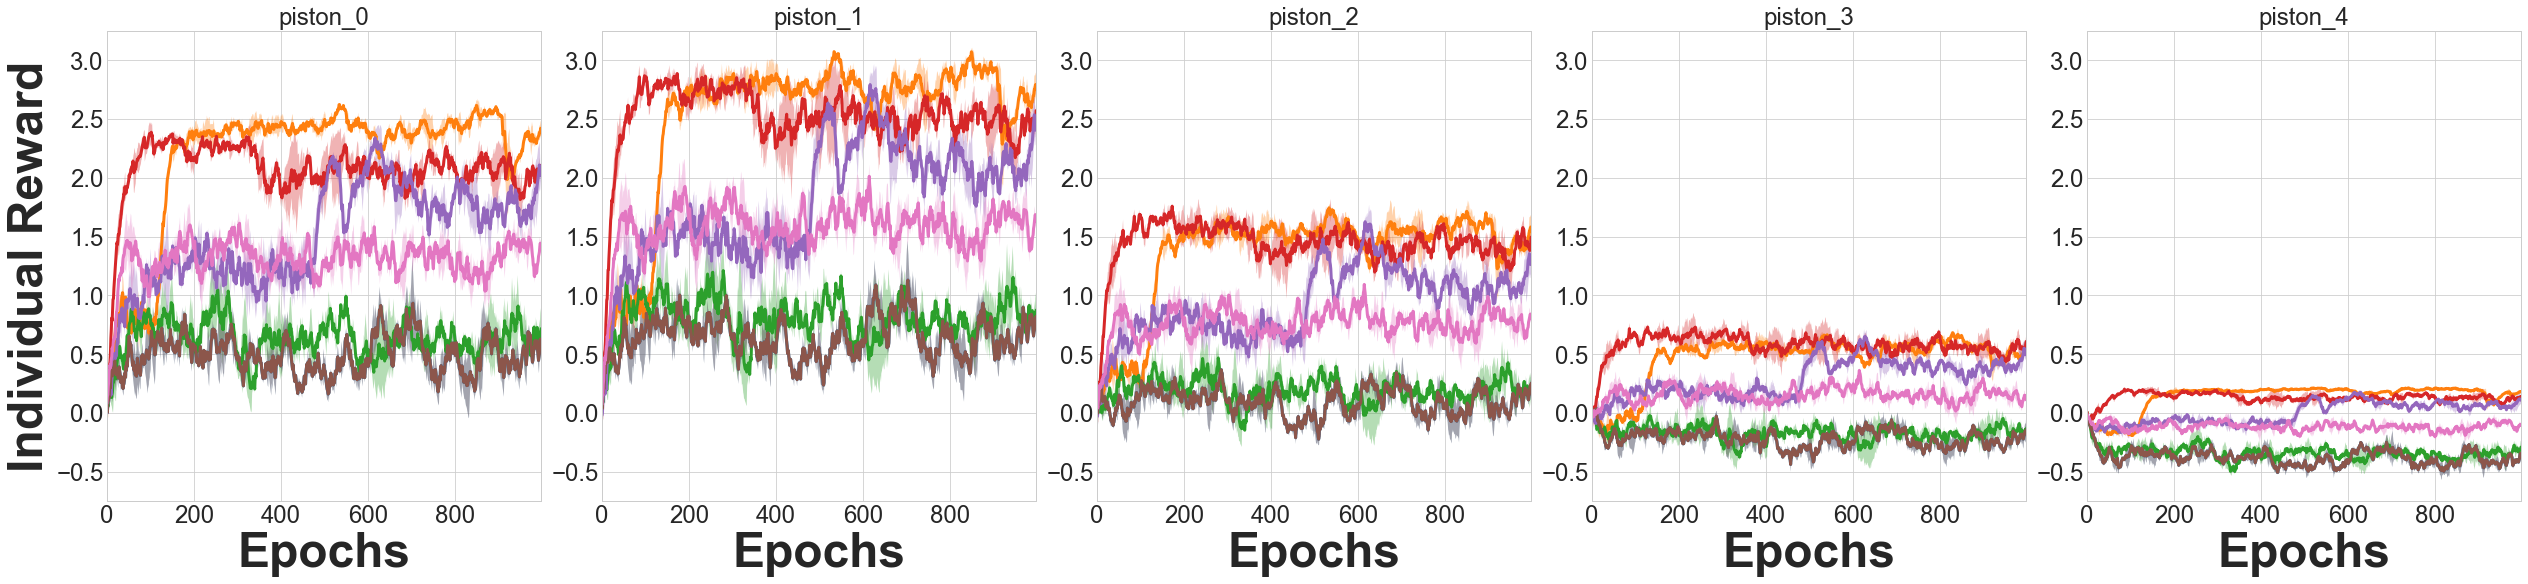

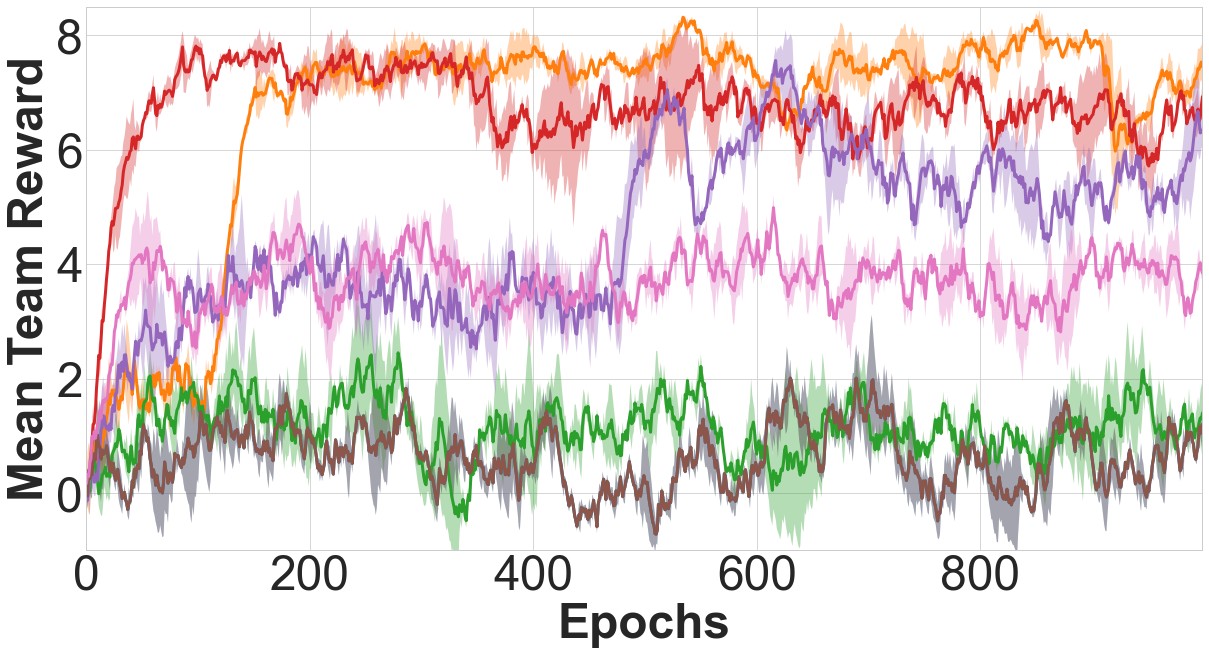

In [3]:
with open(os.path.join('5agent_a2c', 'data.pkl'), 'rb') as f:
    a2c = pickle.load(f)
    
with open(os.path.join('5agent_consensusupdate', 'data.pkl'), 'rb') as f:
    consensus = pickle.load(f)

with open(os.path.join('5agent_infopg_nocritic(k=1)', 'data.pkl'), 'rb') as f:
    infopg_k1 = pickle.load(f)
    
with open(os.path.join('5agent_infopg_nocritic(k=2)', 'data.pkl'), 'rb') as f:
    infopg_k2 = pickle.load(f)
    
with open(os.path.join('5agent_infopg(k=2)', 'data.pkl'), 'rb') as f:
    unclamped = pickle.load(f)
    
with open(os.path.join('5agent_moa', 'data.pkl'), 'rb') as f:
    moa = pickle.load(f)
    
compare_batch([[a2c, 'InfoPG (k=3)'],
               [infopg_k2, 'InfoPG (k=2)'],
               [consensus, 'CU'],
               [unclamped, 'InfoPG Adv(k=2)'],
               [infopg_k1, 'InfoPG (k=1)'],
               [a2c, 'NC-A2C'],
               [moa, 'MOA']
              ], 5, 0, 1000, 2)